tensor(2.1476, grad_fn=<MseLossBackward0>)|tensor(1.9229, grad_fn=<MseLossBackward0>)|tensor(1.7179, grad_fn=<MseLossBackward0>)|tensor(1.5317, grad_fn=<MseLossBackward0>)|tensor(1.3629, grad_fn=<MseLossBackward0>)|tensor(1.2104, grad_fn=<MseLossBackward0>)|tensor(1.0729, grad_fn=<MseLossBackward0>)|tensor(0.9493, grad_fn=<MseLossBackward0>)|tensor(0.8387, grad_fn=<MseLossBackward0>)|tensor(0.7399, grad_fn=<MseLossBackward0>)|tensor(0.6518, grad_fn=<MseLossBackward0>)|tensor(0.5734, grad_fn=<MseLossBackward0>)|tensor(0.5040, grad_fn=<MseLossBackward0>)|tensor(0.4425, grad_fn=<MseLossBackward0>)|tensor(0.3883, grad_fn=<MseLossBackward0>)|tensor(0.3406, grad_fn=<MseLossBackward0>)|tensor(0.2987, grad_fn=<MseLossBackward0>)|tensor(0.2620, grad_fn=<MseLossBackward0>)|tensor(0.2299, grad_fn=<MseLossBackward0>)|tensor(0.2020, grad_fn=<MseLossBackward0>)|tensor(0.1776, grad_fn=<MseLossBackward0>)|tensor(0.1564, grad_fn=<MseLossBackward0>)|tensor(0.1379, grad_fn=<MseLossBackward0>)|tensor(0.12

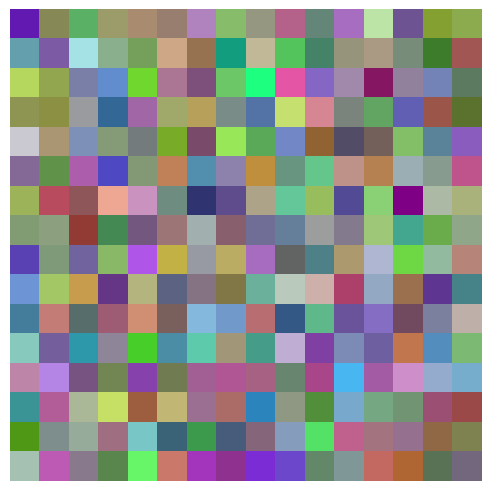

In [2]:
import torch
image = torch.randn(3,16,16)
x0 = torch.randn(3, 16, 16, requires_grad=True)
loss =torch.nn.MSELoss()
optimizer = torch.optim.Adam([x0], lr=0.1)


for i in range(100):
    optimizer.zero_grad()
    l = loss(x0, image)
    l.backward()
    optimizer.step()
    print(l, end= "|")

from glio.visualize import vis_imshow

vis_imshow(x0)

In [ ]:
from typing import Callable
from glio.loaders.image import read as imread
from glio.transforms import fToChannelsLast
from glio.python_tools import auto_compose
import numpy as np
def z_normalize(img):
    return (img - img.mean()) / img.std()

class LearnArray:
    def __init__(self, array:str | torch.Tensor | Callable | np.ndarray, transform = z_normalize, loss = torch.nn.functional.mse_loss):
        if callable(array): array = array()
        if isinstance(array, str): array = fToChannelsLast(imread(array))
        elif isinstance(array, np.ndarray): array = torch.from_numpy(array)

        self.array = torch.tensor(array,requires_grad=True)

        self.transform = auto_compose(transform)
        self.loss = loss

    def parameters(self):pass
